学习R语言聚类分析。

In [1]:
install.packages("cluster")

package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\Rtmp8Saa1o\downloaded_packages


In [2]:
install.packages("NbClust")

package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\Rtmp8Saa1o\downloaded_packages


In [5]:
install.packages("flexclust")

package 'flexclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\Rtmp8Saa1o\downloaded_packages


In [7]:
install.packages("fMultivar")

also installing the dependencies 'timeSeries', 'gss', 'stabledist', 'fBasics', 'cubature', 'sn'




package 'timeSeries' successfully unpacked and MD5 sums checked
package 'gss' successfully unpacked and MD5 sums checked
package 'stabledist' successfully unpacked and MD5 sums checked
package 'fBasics' successfully unpacked and MD5 sums checked
package 'cubature' successfully unpacked and MD5 sums checked
package 'sn' successfully unpacked and MD5 sums checked
package 'fMultivar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\Rtmp8Saa1o\downloaded_packages


In [8]:
install.packages("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\Rtmp8Saa1o\downloaded_packages


In [9]:
install.packages("rattle")

also installing the dependencies 'XML', 'rpart.plot'




package 'XML' successfully unpacked and MD5 sums checked
package 'rpart.plot' successfully unpacked and MD5 sums checked
package 'rattle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\Rtmp8Saa1o\downloaded_packages


# 计算距离

In [11]:
data(nutrient, package="flexclust")
head(nutrient, 4)

,energy,protein,fat,calcium,iron
,<int>,<int>,<int>,<int>,<dbl>
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6


In [12]:
d <- dist(nutrient)
as.matrix(d)[1:4, 1:4]

,BEEF BRAISED,HAMBURGER,BEEF ROAST,BEEF STEAK
BEEF BRAISED,0.00000,95.6400,80.93429,35.24202
HAMBURGER,95.64000,0.0000,176.49218,130.87784
BEEF ROAST,80.93429,176.4922,0.00000,45.76418
BEEF STEAK,35.24202,130.8778,45.76418,0.00000


# 层次聚类分析

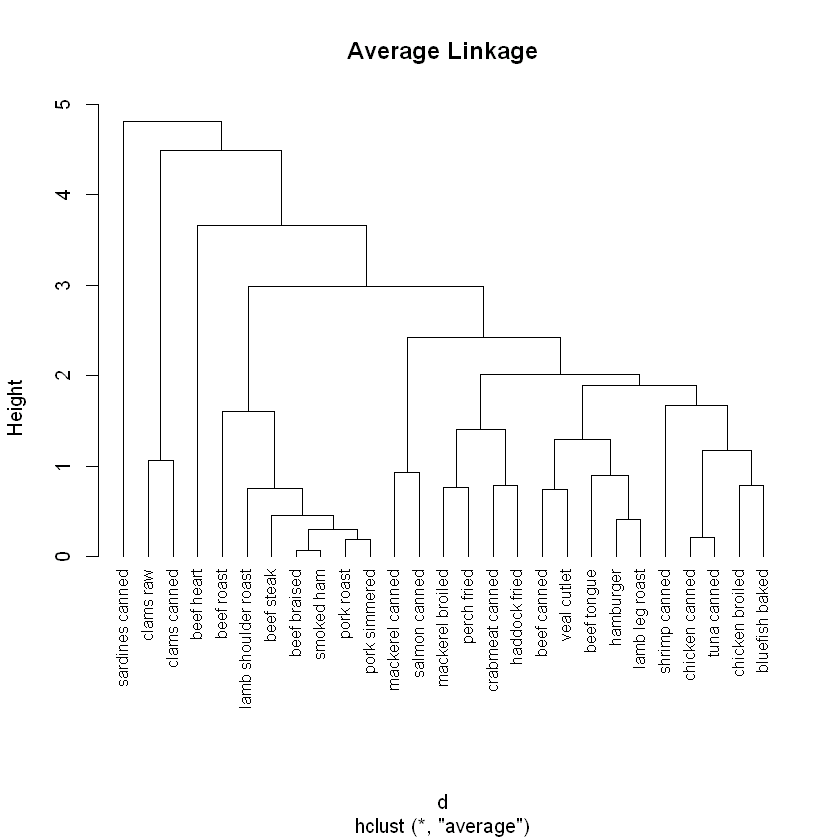

In [15]:
data(nutrient, package="flexclust")
row.names(nutrient) <- tolower(rownames(nutrient))
nutrient.scaled <- scale(nutrient)
d <- dist(nutrient.scaled)
fit.average <- hclust(d, method="average")
plot(fit.average, main="Average Linkage", hang=-1, cex=.8)

Warning message in pf(beale, pp, df2):
"NaNs produced"
Warning message in pf(beale, pp, df2):
"NaNs produced"


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


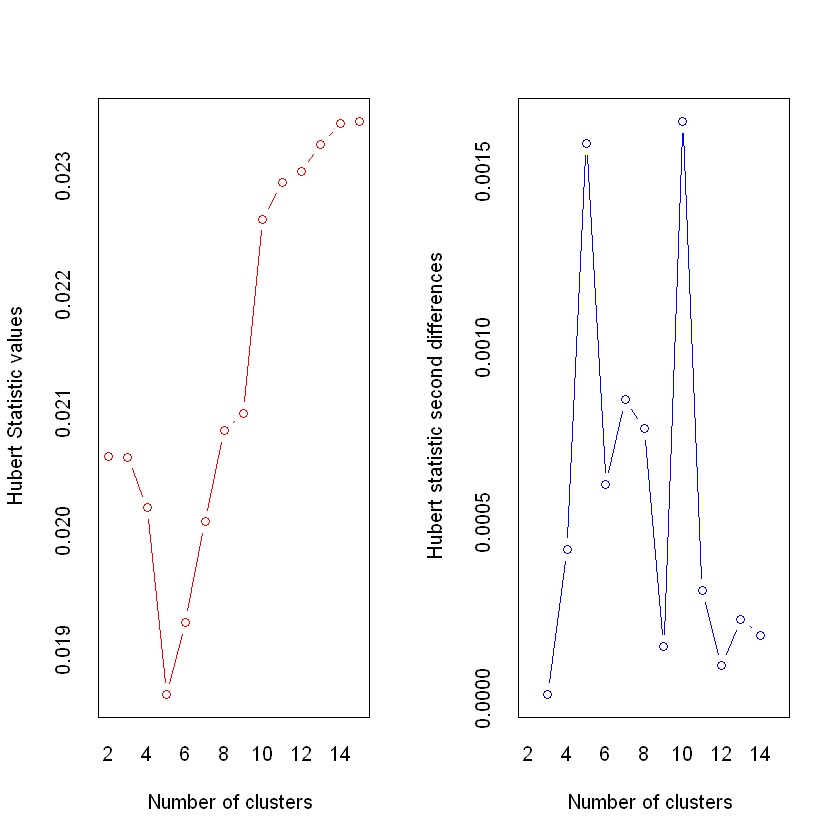

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 2 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 4 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number o


 0  1  2  3  4  5  9 10 13 14 15 
 2  1  4  4  2  4  1  1  2  1  4 

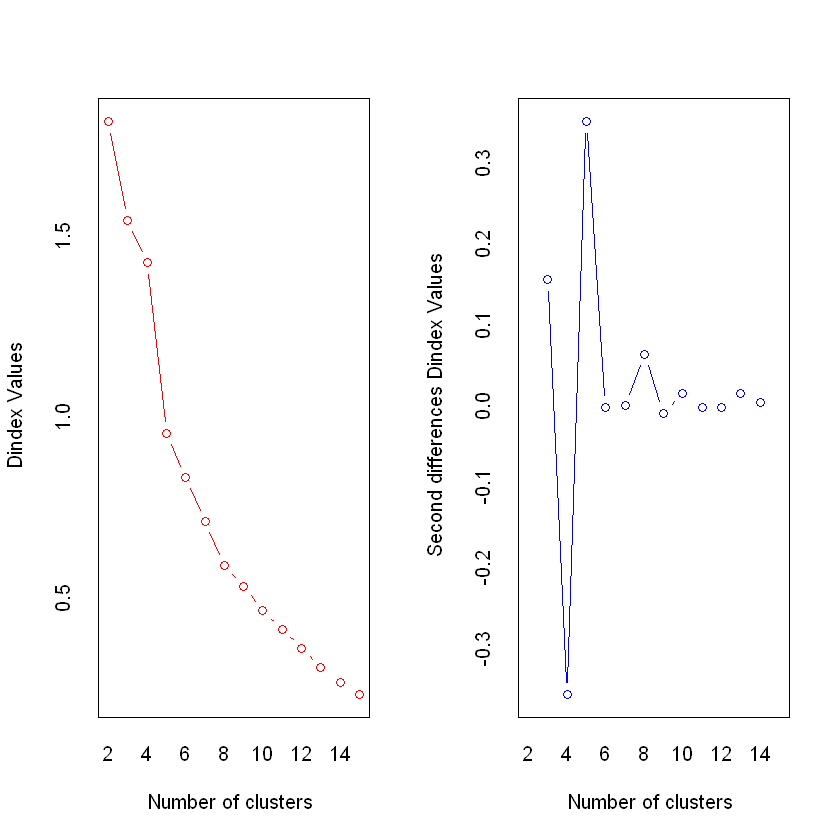

In [18]:
# 选择聚类的个数
library(NbClust)
devAskNewPage(ask=TRUE)
nc <- NbClust(nutrient.scaled, distance="euclidean", min.nc=2, max.nc=15, method="average")
table(nc$Best.n[1,])

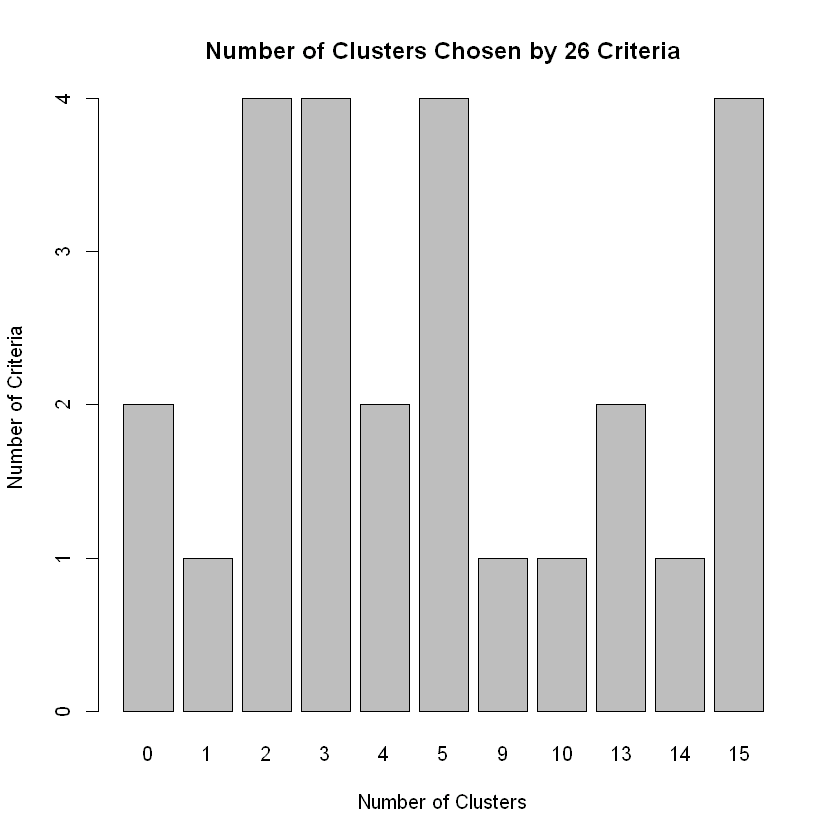

In [19]:
barplot(
    table(nc$Best.n[1,]), 
    xlab="Number of Clusters", 
    ylab="Number of Criteria", 
    main="Number of Clusters Chosen by 26 Criteria"
    )

In [20]:
# 获取最终聚类方案
# 分为5类
clusters <- cutree(fit.average, k=5)
table(clusters)

clusters
 1  2  3  4  5 
 7 16  1  2  1 

In [21]:
# 描述聚类
aggregate(x = nutrient, by = list(cluster = clusters), FUN = median)

cluster,energy,protein,fat,calcium,iron
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,340.0,19,29,9,2.50
2,170.0,20,8,13,1.45
3,160.0,26,5,14,5.90
4,57.5,9,1,78,5.70
5,180.0,22,9,367,2.50


In [22]:
aggregate(x = as.data.frame(nutrient.scaled), by = list(cluster = clusters), FUN = median)

cluster,energy,protein,fat,calcium,iron
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.3101024,0.0000000,1.3785620,-0.4480464,0.08110456
2,-0.3696099,0.2352002,-0.4869384,-0.3967868,-0.63743114
3,-0.4684165,1.6464016,-0.7534384,-0.3839719,2.40779157
4,-1.4811842,-2.3520023,-1.1087718,0.4361807,2.27092763
5,-0.2708033,0.7056007,-0.3981050,4.1396825,0.08110456


In [24]:
class(nutrient.scaled)

[1] "matrix" "array"

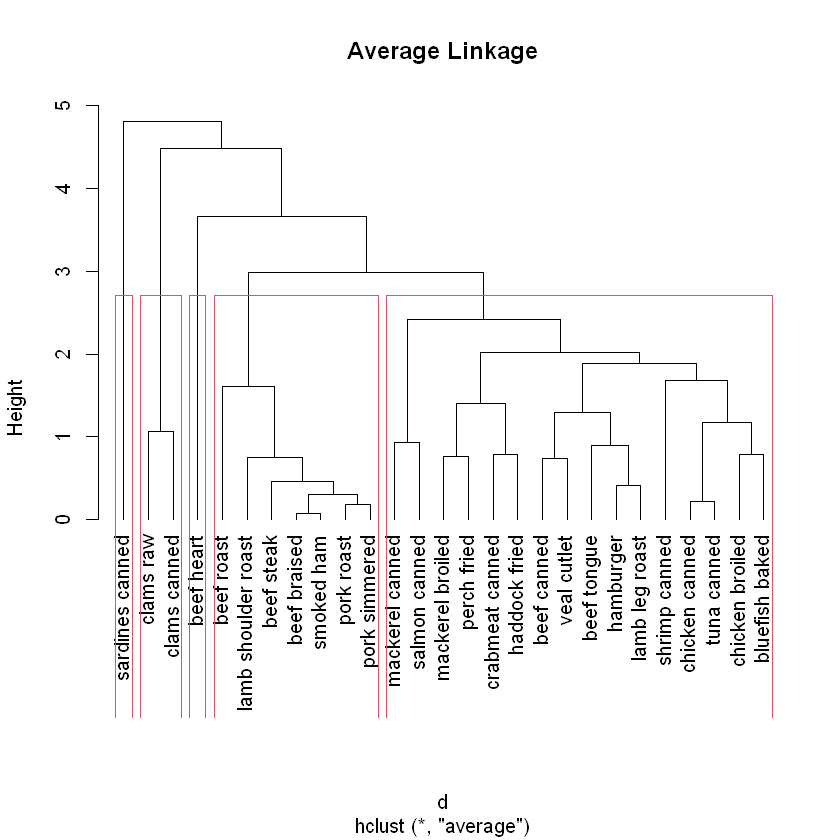

In [25]:
# 结果绘图
plot(x = fit.average, hang = -1, main = "Average Linkage")
rect.hclust(fit.average, k = 5)

# 划分聚类分析

## K均值聚类

In [27]:
wssplot <- function(data, nc=15, seed=1234){
   wss <- (nrow(data)-1)*sum(apply(data,2, var))
   for (i in 2:nc){
       set.seed(seed)
       wss[i] <- sum(kmeans(data, centers=i)$withinss)
    }
    plot(
        1:nc, wss, type="b", xlab="Number of Clusters",
        ylab="Within groups sum of squares"
    )
}

In [28]:
# 查看一下wine数据集
data(wine, package="rattle")
head(wine)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


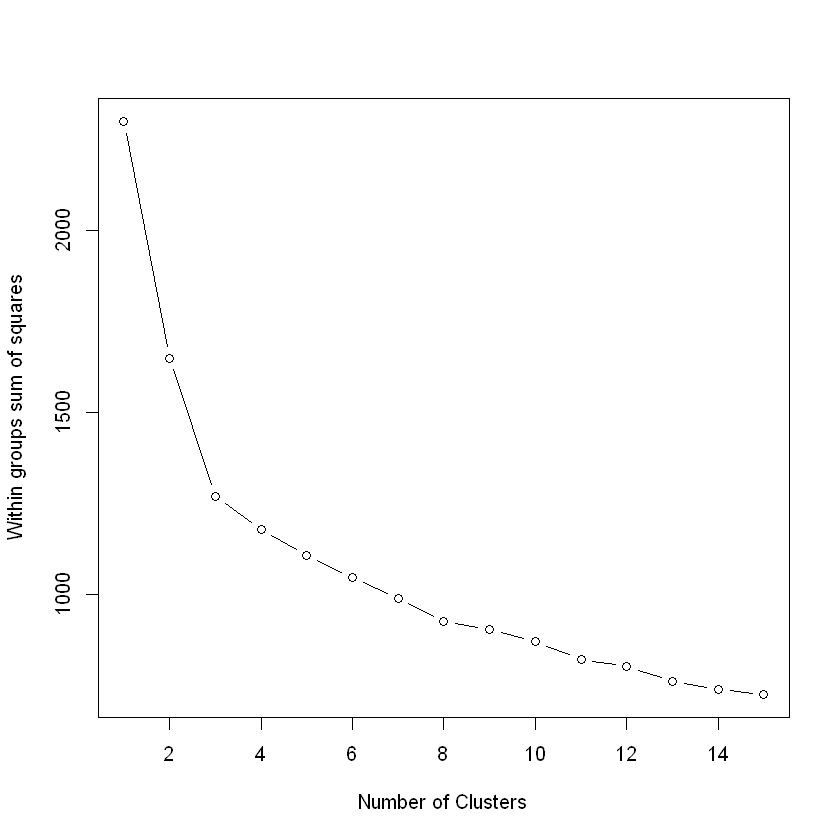

In [31]:
# 标准化数据
df <- scale(wine[-1])

# 决定聚类的个数
wssplot(df)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


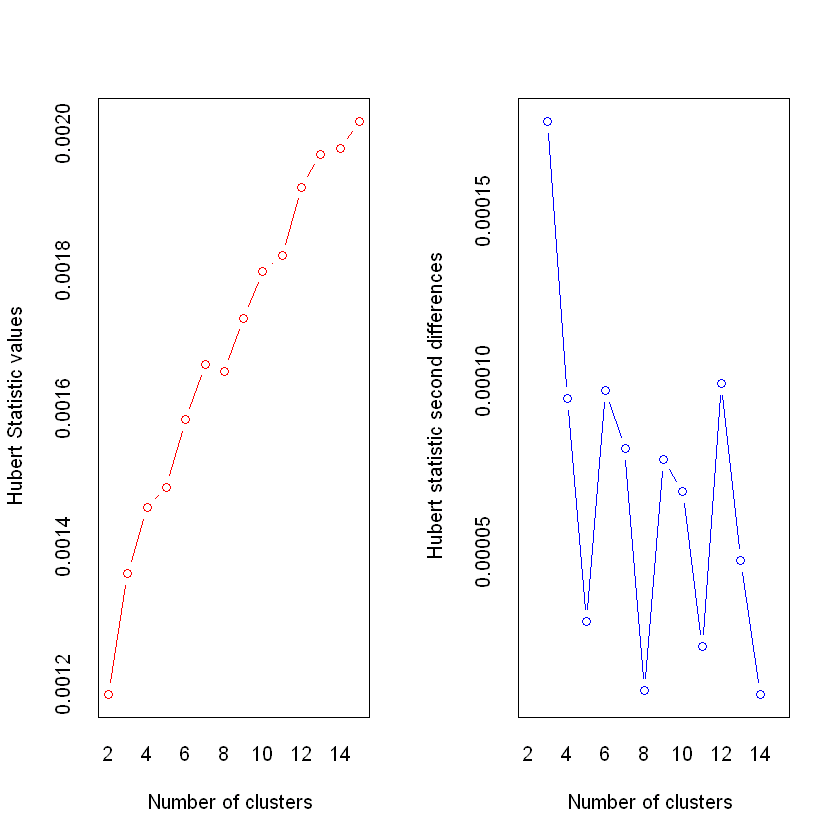

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 19 proposed 3 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 



 0  1  2  3 14 15 
 2  1  2 19  1  1 

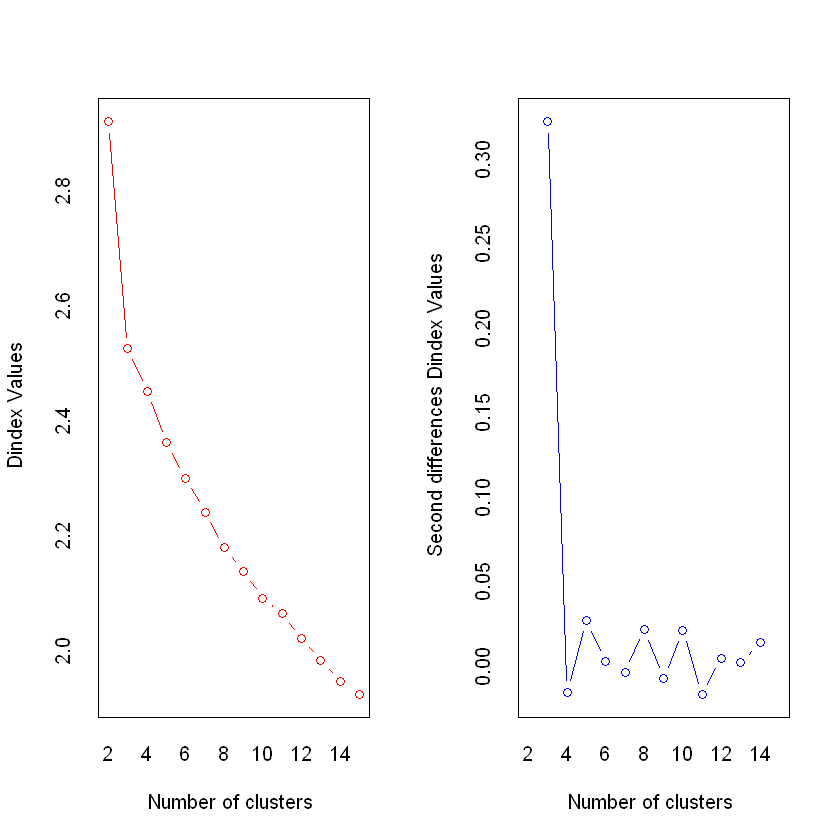

In [32]:
library(NbClust)
set.seed(1234)
devAskNewPage(ask=TRUE)
nc <- NbClust(df, distance="euclidean", min.nc=2, max.nc=15, method="kmeans")
table(nc$Best.n[1,])

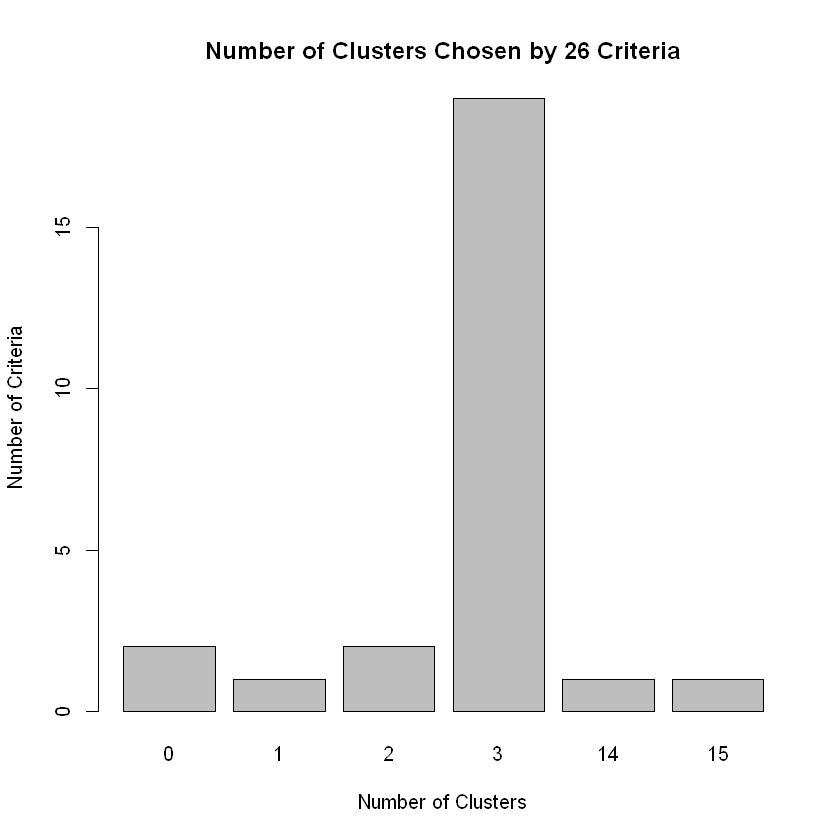

In [35]:
barplot(
    table(nc$Best.n[1,]),
    xlab="Number of Clusters",
    ylab="Number of Criteria",
    main="Number of Clusters Chosen by 26 Criteria"
)

In [36]:
# 进行K均值聚类分析
set.seed(1234)
fit.km <- kmeans(df, 3, nstart=25)
fit.km$size

[1] 62 65 51

In [37]:
fit.km$centers

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,0.8328826,-0.3029551,0.3636801,-0.6084749,0.57596208,0.88274724,0.97506900,-0.56050853,0.57865427,0.1705823,0.4726504,0.7770551,1.1220202
2,-0.9234669,-0.3929331,-0.4931257,0.1701220,-0.49032869,-0.07576891,0.02075402,-0.03343924,0.05810161,-0.8993770,0.4605046,0.2700025,-0.7517257
3,0.1644436,0.8690954,0.1863726,0.5228924,-0.07526047,-0.97657548,-1.21182921,0.72402116,-0.77751312,0.9388902,-1.1615122,-1.2887761,-0.4059428


In [38]:
aggregate(wine[-1], by=list(clusters=fit.km$cluster), FUN=mean)

clusters,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.67677,1.997903,2.466290,17.46290,107.96774,2.847581,3.0032258,0.2920968,1.922097,5.453548,1.0654839,3.163387,1100.2258
2,12.25092,1.897385,2.231231,20.06308,92.73846,2.247692,2.0500000,0.3576923,1.624154,2.973077,1.0627077,2.803385,510.1692
3,13.13412,3.307255,2.417647,21.24118,98.66667,1.683922,0.8188235,0.4519608,1.145882,7.234706,0.6919608,1.696667,619.0588


In [39]:
ct.km <- table(wine$Type, fit.km$cluster)
ct.km

   
     1  2  3
  1 59  0  0
  2  3 65  3
  3  0  0 48

In [40]:
library(flexclust)
randIndex(ct.km)

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



ARI 
0.897495

## 围绕中心点的划分

In [41]:
library(cluster)
set.seed(1234)
fit.pam <- pam(wine[-1], k=3, stand=TRUE) # stand=TRUE表示标准化数据

# 输出中心点
fit.pam$medoids

Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.1,1.04,3.47,920
12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.4,1.00,3.17,510
13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750


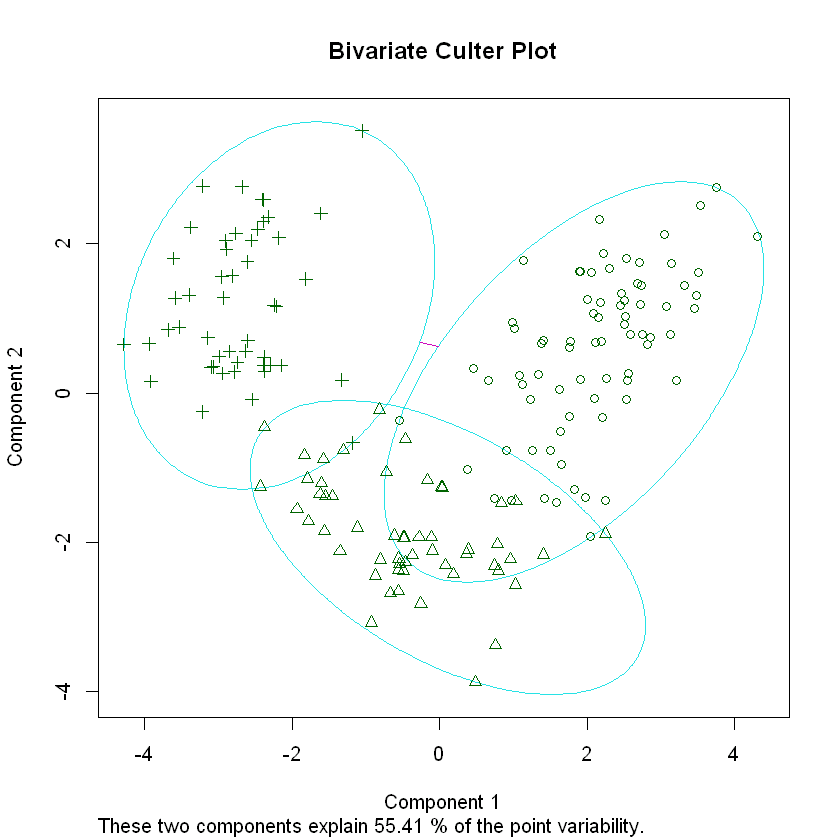

In [42]:
# 画出聚类的方案
clusplot(fit.pam, main="Bivariate Culter Plot")

In [43]:
ct.pam <- table(wine$Type, fit.pam$clustering)
randIndex(ct.pam)

ARI 
0.6994957

# 避免不存在的类

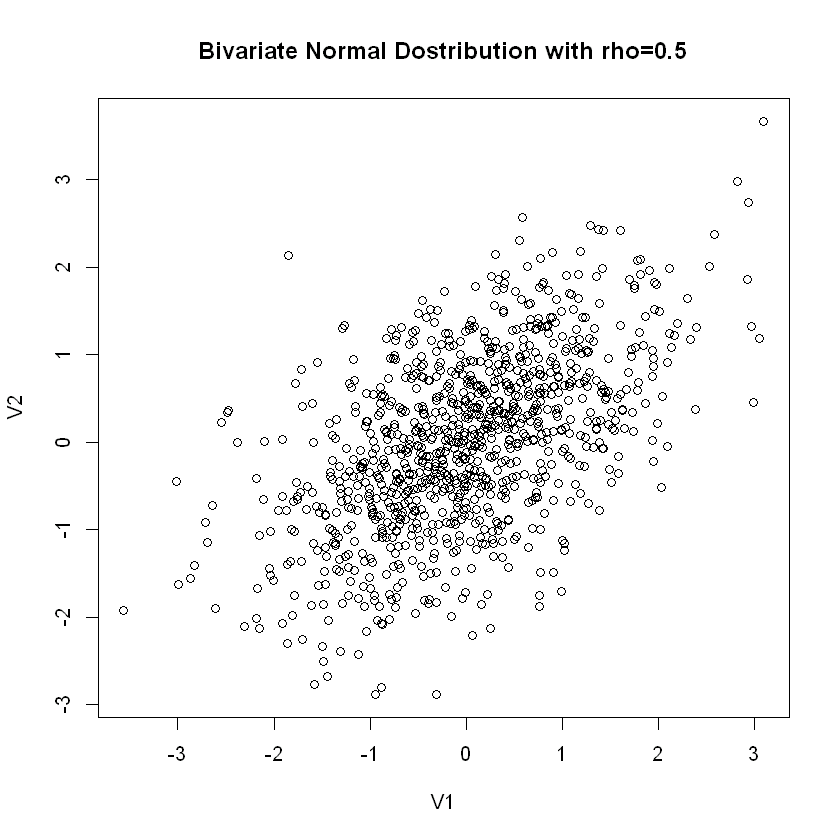

In [44]:
library(fMultivar)
set.seed(1234)
df <- rnorm2d(1000, rho=.5)
df <- as.data.frame(df)
plot(df, main="Bivariate Normal Dostribution with rho=0.5")

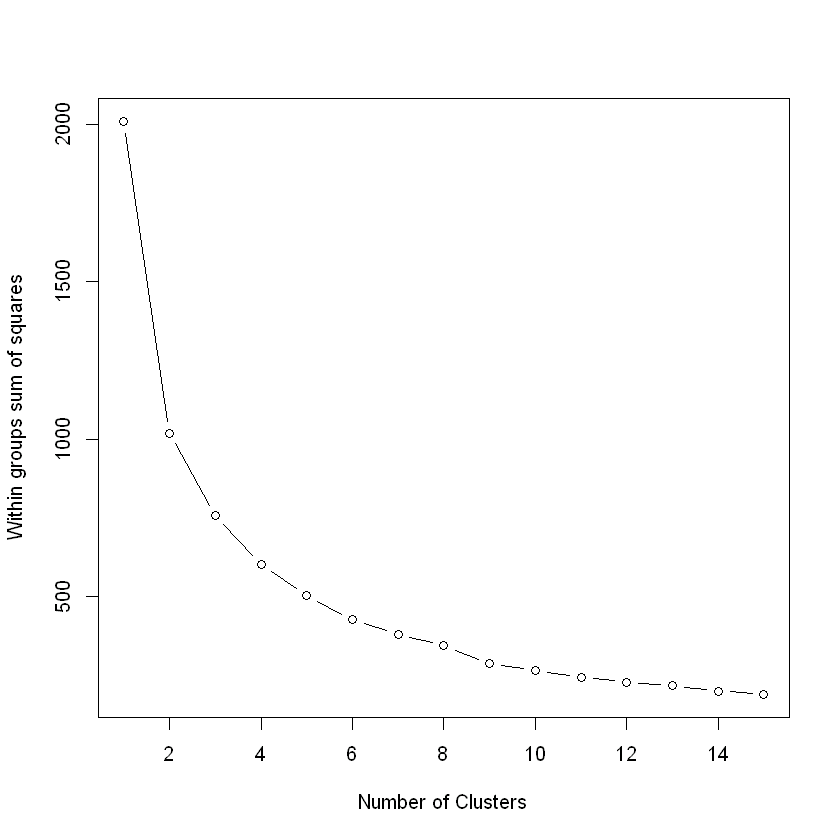

In [45]:
wssplot(df)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


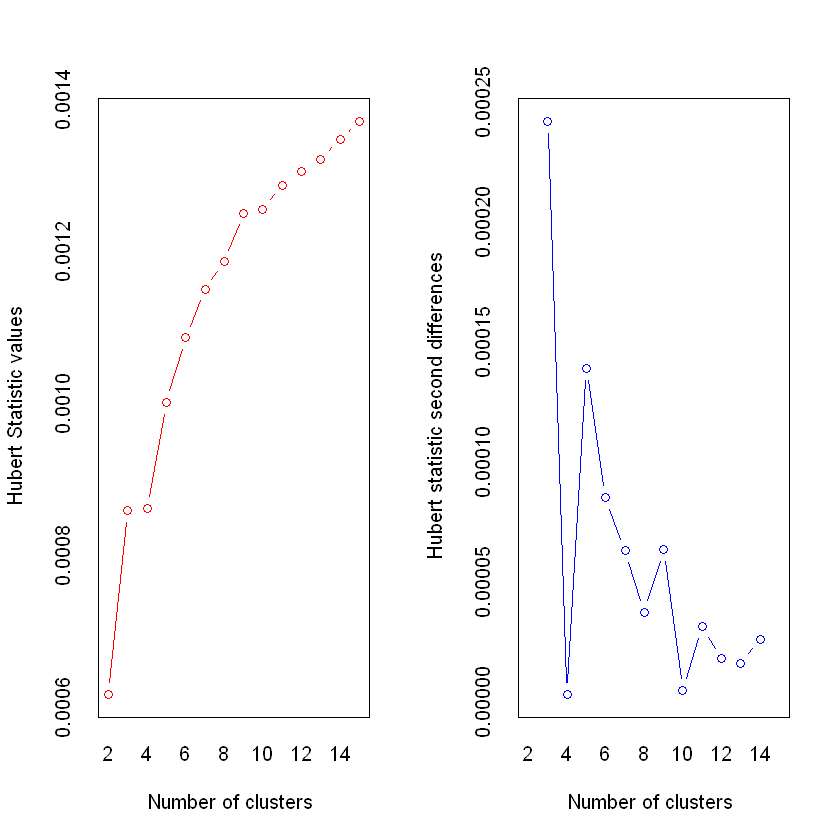

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 4 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
**************************

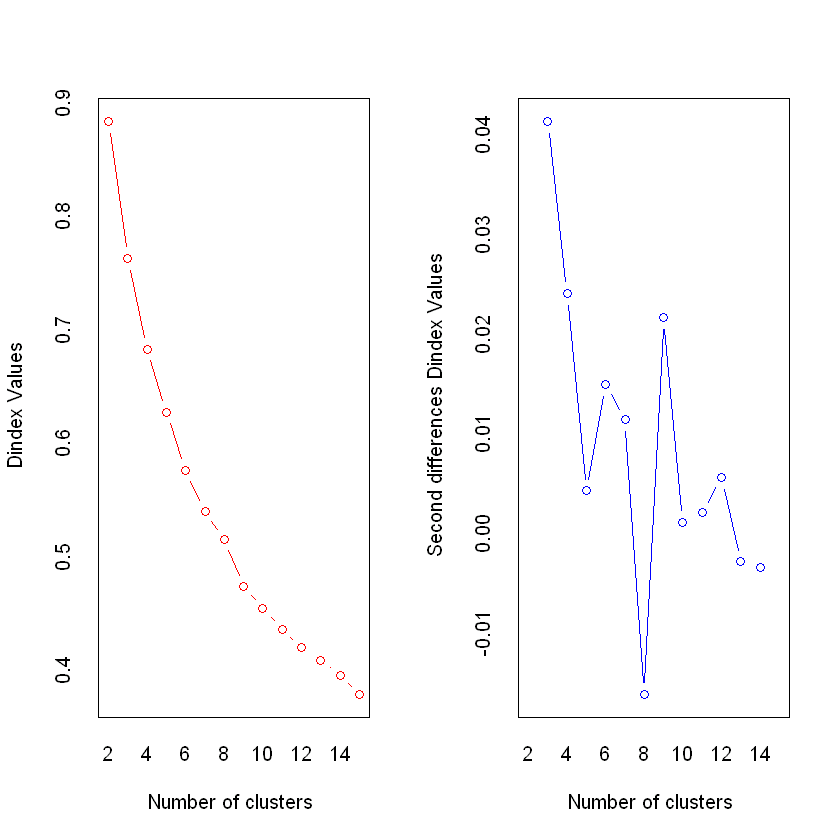

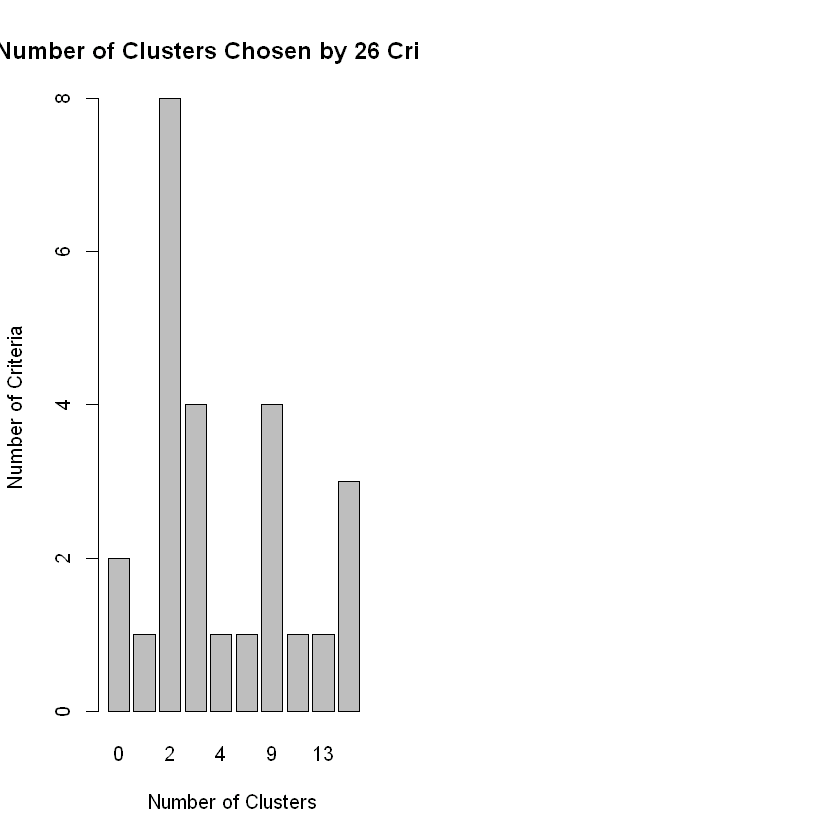

In [48]:
library(NbClust)
nc <- NbClust(df, min.nc=2, max.nc=15, method="kmeans")
barplot(
    table(nc$Best.n[1,]),
    xlab="Number of Clusters",
    ylab="Number of Criteria",
    main="Number of Clusters Chosen by 26 Criteria"
)

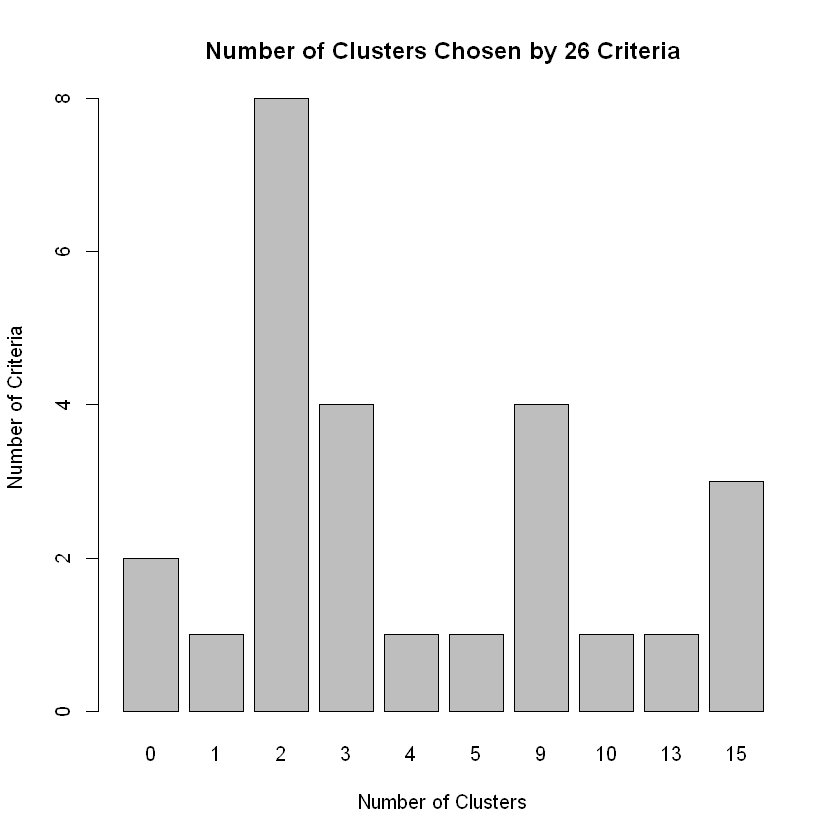

In [47]:
barplot(
    table(nc$Best.n[1,]),
    xlab="Number of Clusters",
    ylab="Number of Criteria",
    main="Number of Clusters Chosen by 26 Criteria"
)

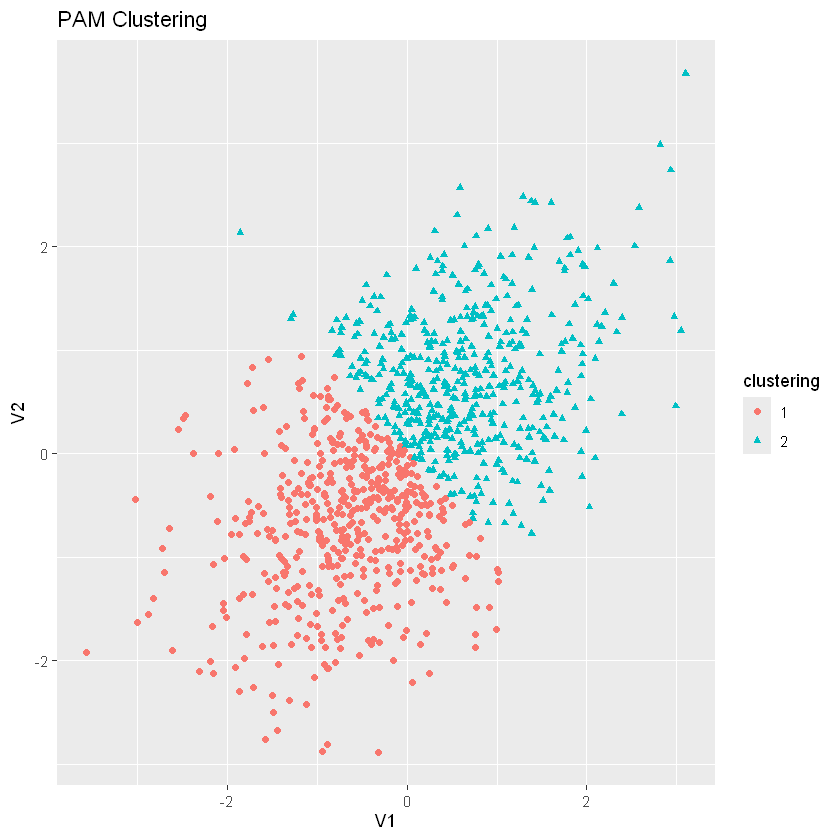

In [51]:
library(ggplot2)
library(cluster)
fit <- pam(df, k=2)
df$clustering <- factor(fit$clustering)
ggplot(
    df, 
    aes(x=V1, y=V2, color=clustering, shape=clustering)
)+geom_point()+ggtitle("PAM Clustering")

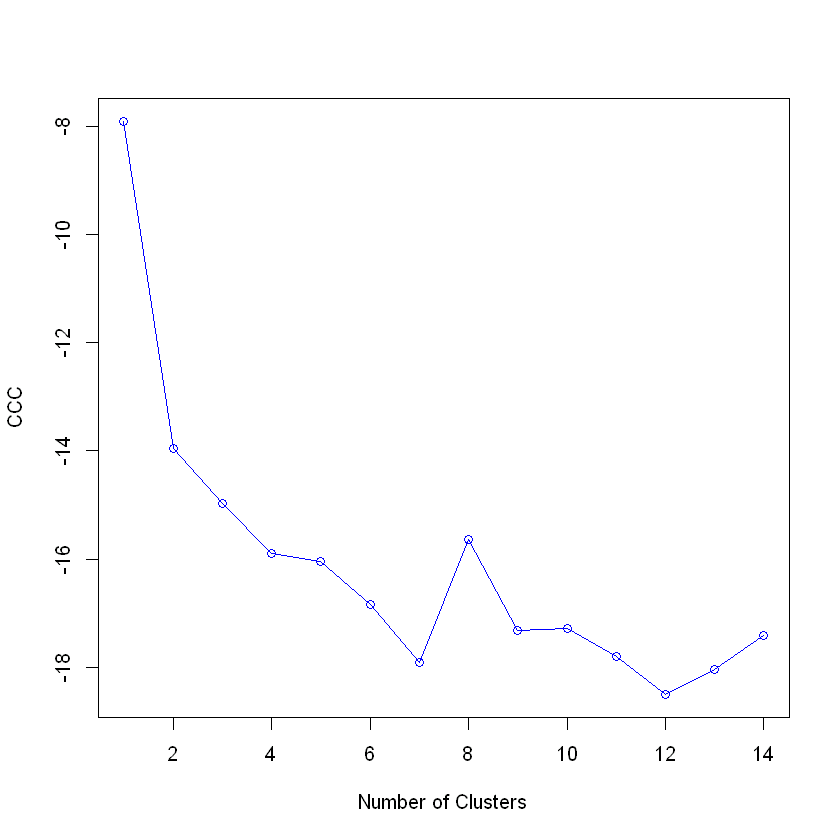

In [52]:
plot(nc$All.index[,4], type="o", ylab="CCC", xlab="Number of Clusters", col="blue")